In [1]:
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
from sklearn import neighbors
import os

In [2]:
#importing crime data#import 
crime = pd.read_csv(os.path.join("combo_crime_data.csv"))
crime.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location,Community_Area_Name
0,24026,JB322801,6/25/18 23:50,123XX S YALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,53.0,01A,1176840.0,1823147.0,2018,7/2/18 15:51,41.670053,-87.628426,"(41.670052557, -87.6284259)",West Pullman
1,11359886,JB322747,6/25/18 22:04,001XX W BRAYTON ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,53.0,08B,1177738.0,1821460.0,2018,7/2/18 15:51,41.665403,-87.625190,"(41.665402959, -87.625190065)",West Pullman
2,11359755,JB322421,6/25/18 17:28,122XX S PARNELL AVE,460,BATTERY,SIMPLE,SIDEWALK,False,False,...,53.0,08B,1174847.0,1823794.0,2018,7/2/18 15:51,41.671873,-87.635701,"(41.671872535, -87.635700877)",West Pullman
3,11359650,JB322719,6/25/18 21:57,002XX W 119TH ST,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,53.0,18,1176651.0,1826025.0,2018,7/2/18 15:51,41.677954,-87.629032,"(41.677954481, -87.629031525)",West Pullman
4,11359309,JB322038,6/25/18 14:24,122XX S NORMAL AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,PARK PROPERTY,False,False,...,53.0,04A,1175177.0,1823767.0,2018,7/2/18 15:51,41.671791,-87.634494,"(41.671791105, -87.634493883)",West Pullman


In [3]:
crime_cleaned =crime.replace('NaN', 0)
crime_cleaned.head(50)

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location,Community_Area_Name
0,24026,JB322801,6/25/18 23:50,123XX S YALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,53.0,01A,1176840.0,1823147.0,2018,7/2/18 15:51,41.670053,-87.628426,"(41.670052557, -87.6284259)",West Pullman
1,11359886,JB322747,6/25/18 22:04,001XX W BRAYTON ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,53.0,08B,1177738.0,1821460.0,2018,7/2/18 15:51,41.665403,-87.625190,"(41.665402959, -87.625190065)",West Pullman
2,11359755,JB322421,6/25/18 17:28,122XX S PARNELL AVE,460,BATTERY,SIMPLE,SIDEWALK,False,False,...,53.0,08B,1174847.0,1823794.0,2018,7/2/18 15:51,41.671873,-87.635701,"(41.671872535, -87.635700877)",West Pullman
3,11359650,JB322719,6/25/18 21:57,002XX W 119TH ST,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,53.0,18,1176651.0,1826025.0,2018,7/2/18 15:51,41.677954,-87.629032,"(41.677954481, -87.629031525)",West Pullman
4,11359309,JB322038,6/25/18 14:24,122XX S NORMAL AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,PARK PROPERTY,False,False,...,53.0,04A,1175177.0,1823767.0,2018,7/2/18 15:51,41.671791,-87.634494,"(41.671791105, -87.634493883)",West Pullman
5,11359292,JB322199,6/25/18 16:12,001XX E 118TH PL,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,53.0,04B,1184829.0,1843971.0,2018,7/2/18 15:51,41.727013,-87.598537,"(41.727013209, -87.598537052)",West Pullman
6,11360199,JB323289,6/25/18 14:00,119XX S MICHIGAN AVE,820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,53.0,6,1178982.0,1825948.0,2018,7/2/18 15:51,41.677691,-87.620502,"(41.677690578, -87.620501646)",West Pullman
7,11360192,JB322081,6/25/18 14:58,119XX S HALSTED ST,320,ROBBERY,STRONGARM - NO WEAPON,CURRENCY EXCHANGE,False,False,...,53.0,3,1173139.0,1825780.0,2018,7/2/18 15:51,41.677360,-87.641894,"(41.67736022, -87.641893815)",West Pullman
8,11359139,JB322070,6/25/18 14:30,0000X W 119TH ST,4650,OTHER OFFENSE,SEX OFFENDER: FAIL TO REGISTER,SIDEWALK,False,False,...,53.0,26,1178191.0,1826061.0,2018,7/2/18 15:51,41.678019,-87.623394,"(41.678018588, -87.62339354)",West Pullman
9,11358960,JB321875,6/25/18 10:37,001XX E 118TH PL,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,53.0,15,1179324.0,1826424.0,2018,7/2/18 15:51,41.678989,-87.619235,"(41.678989021, -87.619235381)",West Pullman


In [4]:
#getting rid of columns we do not want the KNN algorithm to learn on 
crime_cleaned = crime.drop(["Date", "ID", "Case_Number", "Block", "IUCR", "Description", "X_Coordinate", "Y_Coordinate", "Year", "Updated_On", "Latitude", "Longitude", "Location"], axis=1)
crime_cleaned.head(100)

,Primary_Type,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Community_Area_Name
0,HOMICIDE,STREET,False,False,523,5,34.0,53.0,01A,West Pullman
1,BATTERY,RESIDENCE,False,True,523,5,9.0,53.0,08B,West Pullman
2,BATTERY,SIDEWALK,False,False,523,5,34.0,53.0,08B,West Pullman
3,NARCOTICS,SIDEWALK,True,False,522,5,34.0,53.0,18,West Pullman
4,ASSAULT,PARK PROPERTY,False,False,523,5,34.0,53.0,04A,West Pullman
5,BATTERY,STREET,False,False,532,4,9.0,53.0,04B,West Pullman
6,THEFT,APARTMENT,False,False,532,5,9.0,53.0,6,West Pullman
7,ROBBERY,CURRENCY EXCHANGE,False,False,524,5,34.0,53.0,3,West Pullman
8,OTHER OFFENSE,SIDEWALK,False,False,522,5,9.0,53.0,26,West Pullman
9,WEAPONS VIOLATION,STREET,False,False,532,5,9.0,53.0,15,West Pullman


In [5]:
#look at column data types 
crime_cleaned.dtypes

Primary_Type             object
Location_Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community_Area          float64
FBI_Code                 object
Community_Area_Name      object
dtype: object

In [6]:
#apply get_dummies to change object data types
crime_dummies= pd.get_dummies(crime_cleaned)
crime_dummies.head()

,Arrest,Domestic,Beat,District,Ward,Community_Area,Primary_Type_ARSON,Primary_Type_ASSAULT,Primary_Type_BATTERY,Primary_Type_BURGLARY,...,Community_Area_Name_Washington Heights,Community_Area_Name_Washington Park,Community_Area_Name_West Elsdon,Community_Area_Name_West Englewood,Community_Area_Name_West Garfield Park,Community_Area_Name_West Lawn,Community_Area_Name_West Pullman,Community_Area_Name_West Ridge,Community_Area_Name_West Town,Community_Area_Name_Woodlawn
0,False,False,523,5,34.0,53.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,False,True,523,5,9.0,53.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,False,False,523,5,34.0,53.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,True,False,522,5,34.0,53.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,False,False,523,5,34.0,53.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
crime_dummies.shape

(121696, 262)

In [8]:
target = crime_dummies["Arrest"]
target_names = ["false", "positive"]

In [9]:
crime_data = crime_dummies.drop("Arrest", axis=1)
feature_names = crime_data.columns
crime_data.head()

,Domestic,Beat,District,Ward,Community_Area,Primary_Type_ARSON,Primary_Type_ASSAULT,Primary_Type_BATTERY,Primary_Type_BURGLARY,Primary_Type_CONCEALED CARRY LICENSE VIOLATION,...,Community_Area_Name_Washington Heights,Community_Area_Name_Washington Park,Community_Area_Name_West Elsdon,Community_Area_Name_West Englewood,Community_Area_Name_West Garfield Park,Community_Area_Name_West Lawn,Community_Area_Name_West Pullman,Community_Area_Name_West Ridge,Community_Area_Name_West Town,Community_Area_Name_Woodlawn
0,False,523,5,34.0,53.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,True,523,5,9.0,53.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,False,523,5,34.0,53.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,False,522,5,34.0,53.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,False,523,5,34.0,53.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
##crime_data[['Ward', 'Community_Area']] = crime_data[['Ward', 'Community_Area']].astype(int)
##pd.isnull(crime_data).sum() > 0

In [10]:
# Assign X (data) and y (target)
X = crime_dummies.drop("Arrest", axis=1)
y = crime_dummies["Arrest"]
print(X.shape, y.shape)

(121696, 261) (121696,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(crime_data, target, random_state=42, stratify=y)

In [12]:
#Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
                        
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.921/0.830
k: 3, Train/Test Score: 0.902/0.858
k: 5, Train/Test Score: 0.893/0.868
k: 7, Train/Test Score: 0.888/0.870
k: 9, Train/Test Score: 0.884/0.872
k: 11, Train/Test Score: 0.880/0.871
k: 13, Train/Test Score: 0.878/0.869
k: 15, Train/Test Score: 0.875/0.868
k: 17, Train/Test Score: 0.873/0.866
k: 19, Train/Test Score: 0.870/0.864


In [18]:
print(test_scores)

[0.82990402313962663, 0.85790823034446495, 0.86750591638180385, 0.8699710754667368, 0.87158164606889299, 0.87082566394951355, 0.8690507494083618, 0.86773599789639755, 0.86582960820404942, 0.86389034972390222]


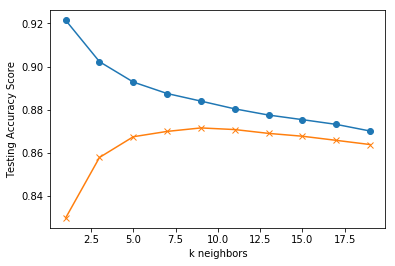

In [20]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [21]:
# Note that k: 19 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

k=3 Test Acc: 0.858
